In [153]:
import numpy as np
from scipy.special import owens_t
import matplotlib.pyplot as plt
# get a logger
import logging
logger = logging.getLogger(__name__)
from ERM import fair_adversarial_error_erm
from state_evolution import OverlapSet, fair_adversarial_error_overlaps
%load_ext autoreload
%autoreload 2
from scipy.integrate import quad, dblquad
from state_evolution import evaluate_high_alpha_proximal, evaluate_proximal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


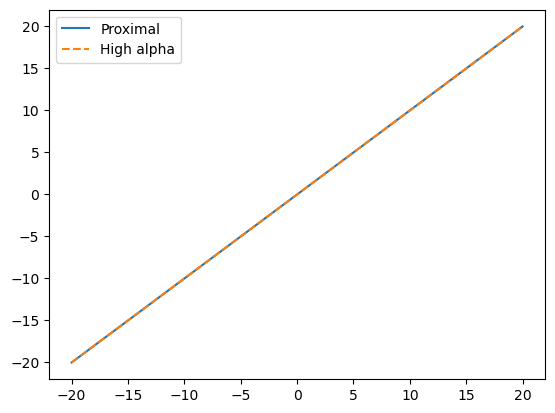

In [154]:
V_0 = 10e-4
y = 1
epsilon_term = 10
w = 5.84
alpha = 10e5
V = V_0 / alpha

ws = np.linspace(-20,20,100)

plt.plot(ws, [evaluate_proximal(V,y,epsilon_term,w) for w in ws], label="Proximal")
plt.plot(ws, [evaluate_high_alpha_proximal(V,y,epsilon_term,w,alpha) for w in ws], "--", label="High alpha")

plt.legend()

# z = evaluate_proximal(V,y,epsilon_term,w)
# high_alpha_z = evaluate_high_alpha_proximal(V,y,epsilon_term,w,alpha)
# print("Proximal: ", z)
# print("High alpha: ", high_alpha_z)

In [155]:
r = np.exp( -y*w + epsilon_term )
x = V * r 
print(r,x)

64.07152259993664 6.407152259993665e-08


In [156]:
x

6.407152259993665e-08

In [157]:
V

1e-09

In [158]:
1/np.log(x)

-0.060374566818180056

In [159]:
y*np.log( - r/x )


/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_59296/2011839922.py:1: RuntimeWarning: invalid value encountered in log
  y*np.log( - r/x )


nan

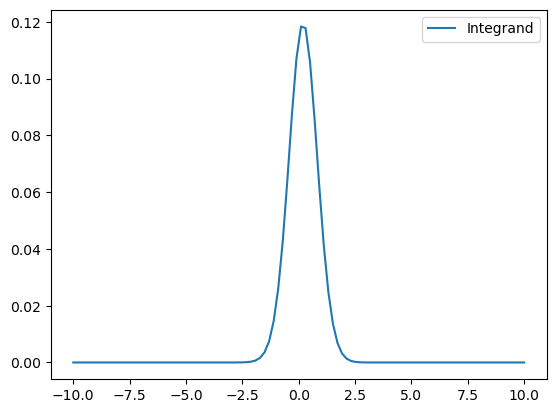

In [160]:
from state_evolution import _q_hat_integrand, logistic_q_hat_func
# m_1.3872960517149653, q: 1.9249981319621203, sigma: 0.0004650424205959275, P: 1.9249981319621203, N: 1.9249981319621203, A: 1.9249981319621203, F: 1.3872960517149653
xis = np.linspace(-10,10,100)

integrands = [_q_hat_integrand(x,-1,1.38,1.92,1,1,0.1,1.92,1.92,0.00046,10e3) for x in xis]

plt.plot(xis, integrands, label="Integrand")

plt.legend()

In [161]:
overlaps = OverlapSet
overlaps.m = 1.38
overlaps.q = 1.92
overlaps.sigma = 0.00046
overlaps.P = 1.92
overlaps.N = 1.92
overlaps.A = 1.92
overlaps.F = 1.38

logistic_q_hat_func(overlaps,1,10e3,0.1,1)

1892.6795400023805

In [163]:
logistic_q_hat_func(overlaps,1,10e5,0.1,1)

189267.95400023804